# Step 1: Load the Data
● Load both CSVs into Pandas DataFrames
● Check shape, structure, and preview

In [1]:
import pandas as pd
DF = pd.read_excel(r"Customer_Master_Data project related.xlsx")
DF.head()

,CustomerID,Name,Email,Gender,Age,City,MaritalStatus,NumChildren,JoinDate
0,CUST10000,Onkar Bhargava,pkeer@yahoo.com,Male,54,Delhi,Divorced,0,2021-02-22
1,CUST10001,Divit Kohli,mkalita@sarin.com,Female,48,Kolkata,Married,0,2023-12-06
2,CUST10002,Kiara Behl,apteanay@hotmail.com,Male,75,Kolkata,Widowed,2,2023-08-23
3,CUST10003,Vaibhav Sankar,bseshadri@choudhry.info,Male,62,Pune,Divorced,2,2022-11-17
4,CUST10004,Shray D’Alia,bdhillon@toor-mall.com,Male,55,Delhi,Divorced,0,2022-12-04


In [2]:
DF1 = pd.read_csv(r"Customer_Transactions project related.csv")
DF1.head()

,CustomerID,TransactionDate,TransactionAmount
0,CUST10771,7/31/23,2383.07
1,CUST10100,3/10/24,497.54
2,CUST10031,2/17/25,536.78
3,CUST10987,7/17/23,314.89
4,CUST10831,12/15/24,2543.19


In [3]:
DF.shape
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     1000 non-null   object        
 1   Name           1000 non-null   object        
 2   Email          1000 non-null   object        
 3   Gender         1000 non-null   object        
 4   Age            1000 non-null   int64         
 5   City           1000 non-null   object        
 6   MaritalStatus  1000 non-null   object        
 7   NumChildren    1000 non-null   int64         
 8   JoinDate       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 70.4+ KB


In [4]:
DF1.shape
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23050 entries, 0 to 23049
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         23050 non-null  object 
 1   TransactionDate    23050 non-null  object 
 2   TransactionAmount  23050 non-null  float64
dtypes: float64(1), object(2)
memory usage: 540.4+ KB


# Step 2: Clean the Data
● Convert JoinDate and TransactionDate columns to datetime
● Ensure no nulls or bad types
● Validate uniqueness of CustomerID in master dataset
● Ensure all transaction CustomerIDs exist in master data

In [5]:
DF['JoinDate'] = pd.to_datetime(DF['JoinDate'], errors='coerce')

In [6]:
DF1['TransactionDate'] = pd.to_datetime(DF1['TransactionDate'],infer_datetime_format=True,errors='coerce')

C:\Users\sujee\AppData\Local\Temp\ipykernel_20568\4122421938.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  DF1['TransactionDate'] = pd.to_datetime(DF1['TransactionDate'],infer_datetime_format=True,errors='coerce')
C:\Users\sujee\AppData\Local\Temp\ipykernel_20568\4122421938.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DF1['TransactionDate'] = pd.to_datetime(DF1['TransactionDate'],infer_datetime_format=True,errors='coerce')


# Step 3: Merge 
● Join Customer_Master_Data with Customer_Transactions on CustomerID

In [7]:
final_df = pd.merge(DF,DF1,on="CustomerID",how='right')
final_df

,CustomerID,Name,Email,Gender,Age,City,MaritalStatus,NumChildren,JoinDate,TransactionDate,TransactionAmount
0,CUST10771,Lakshay Dhillon,dharmajantara@gmail.com,Female,27,Ahmedabad,Widowed,3,2023-05-31,2023-07-31,2383.07
1,CUST10100,Aniruddh Borah,jivikabhavsar@gmail.com,Female,53,Lucknow,Divorced,4,2022-01-08,2024-03-10,497.54
2,CUST10031,Ritvik Ahuja,jhaverifarhan@chandra.org,Male,40,Ahmedabad,Single,0,2023-12-03,2025-02-17,536.78
3,CUST10987,Jayan Wagle,ojas82@gmail.com,Not Disclosed,75,Bangalore,Widowed,4,2022-03-18,2023-07-17,314.89
4,CUST10831,Ishita Agarwal,vbalay@yahoo.com,Not Disclosed,27,Jaipur,Divorced,4,2021-06-30,2024-12-15,2543.19
...,...,...,...,...,...,...,...,...,...,...,...
23045,CUST10710,Divit Toor,saksham79@ram.biz,Not Disclosed,73,Mumbai,Widowed,1,2024-02-18,2024-03-11,931.09
23046,CUST10209,Jivin Cheema,darivana@hotmail.com,Male,56,Pune,Married,1,2024-05-09,2024-06-19,2659.35
23047,CUST10570,Advika Dyal,granganathan@sathe-dhar.org,Not Disclosed,26,Pune,Single,1,2021-03-29,2024-06-27,266.97
23048,CUST10075,Amira Lall,vanyabiswas@kannan.biz,Female,29,Jaipur,Married,1,2023-02-25,2023-12-26,1671.73


In [8]:
final_df['TransactionDate'] = pd.to_datetime(final_df['TransactionDate'], format='%d-%m-%Y',errors='coerce')
final_df['JoinDate'] = pd.to_datetime(final_df['JoinDate'], format='%d-%m-%Y',errors='coerce')

In [9]:
final_df.isnull().sum()

CustomerID           0
Name                 0
Email                0
Gender               0
Age                  0
City                 0
MaritalStatus        0
NumChildren          0
JoinDate             0
TransactionDate      0
TransactionAmount    0
dtype: int64

In [10]:
DF['CustomerID'].is_unique

True

In [11]:
invalid_ids = DF1[~DF1['CustomerID'].isin(DF['CustomerID'])]
invalid_ids.shape


(0, 3)

In [12]:
DF = DF.drop_duplicates()
DF1 = DF1.drop_duplicates()

In [31]:
ref_date = final_df['TransactionDate'].max() + pd.Timedelta(days=1)

# Step 4: Perform RFM Calculation
● Use groupby on CustomerID for:
o max(TransactionDate) → Recency
o count(TransactionDate) → Frequency
o sum(TransactionAmount) → Monetary
● Use a reference date to compute Recency in number of days
● Store result in a new DataFrame called df_rfm

In [14]:
df_rfm = final_df.groupby("CustomerID").agg(
    monetary = ("TransactionAmount", "sum"),
    frequency = ("TransactionDate", "count"),
    recency = ("TransactionDate", lambda x:(ref_date - x.max()).days)
).reset_index()

df_rfm.columns = ['CustomerID','Monetary','Frequency','Recency']
df_rfm

,CustomerID,Monetary,Frequency,Recency
0,CUST10000,21265.49,23,13
1,CUST10001,28654.31,30,35
2,CUST10002,23884.03,24,18
3,CUST10003,24206.03,25,81
4,CUST10004,25565.30,19,8
...,...,...,...,...
995,CUST10995,24325.19,21,402
996,CUST10996,21809.11,21,15
997,CUST10997,21120.48,20,32
998,CUST10998,29494.56,25,126


In [15]:
df_rfm['R_Score'] = pd.qcut(df_rfm['Recency'], 5, labels=[5,4,3,2,1])
df_rfm['F_Score'] = pd.qcut(df_rfm['Frequency'], 5, labels=[1,2,3,4,5])
df_rfm['M_Score'] = pd.qcut(df_rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [16]:
df_rfm['RFM'] = df_rfm['R_Score'].astype(str) + \
                df_rfm['F_Score'].astype(str) + \
                df_rfm['M_Score'].astype(str)

In [17]:
def segment(row):
    if row['R_Score']>=4 and row['F_Score']>=4 and row['M_Score']>=4:
        return 'Champions'
    elif row['F_Score']>=4 and row['R_Score']>=2:
        return 'Loyal Customers'
    elif row['R_Score']>=4 and row['F_Score']>=2:
        return 'Potential Loyalist'
    elif row['R_Score']<=2 and row['F_Score']>=3:
        return 'At Risk'
    elif row['R_Score']==1 and row['F_Score']<=2:
        return 'Lost'
    elif row['M_Score']>=4:
        return 'Big Spenders'
    else:
        return 'Others'

df_rfm['Segment'] = df_rfm.apply(segment, axis=1)


In [18]:
df_rfm['Segment'].value_counts()

Segment
Others                247
Loyal Customers       191
Potential Loyalist    167
At Risk               130
Champions             127
Lost                  105
Big Spenders           33
Name: count, dtype: int64

In [19]:
df_rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)

Segment
Loyal Customers       5122606.00
Others                4384756.69
Champions             3725144.54
Potential Loyalist    3674855.18
At Risk               3257085.87
Lost                  2015334.43
Big Spenders           873416.95
Name: Monetary, dtype: float64

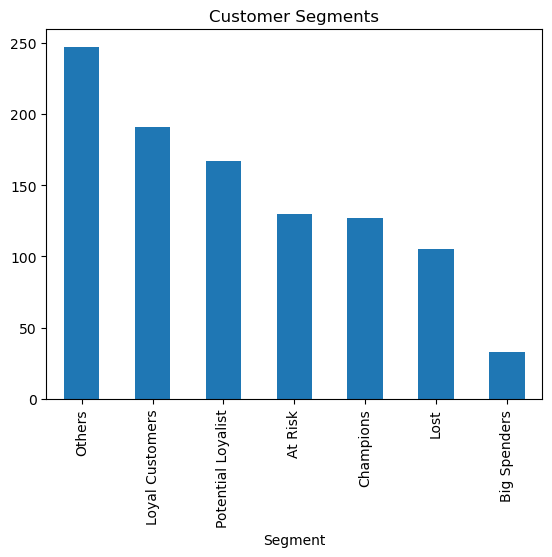

In [20]:
import matplotlib.pyplot as plt

df_rfm['Segment'].value_counts().plot(kind='bar')
plt.title('Customer Segments')
plt.show()


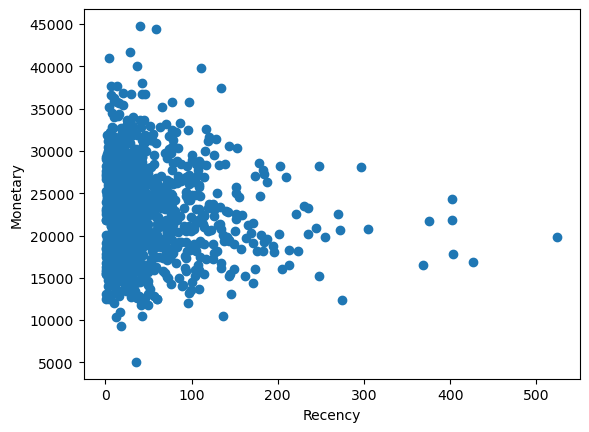

In [21]:
plt.scatter(df_rfm['Recency'], df_rfm['Monetary'])
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

In [22]:
df_rfm_sorted = df_rfm.sort_values(by='Monetary', ascending=False)
df_rfm_sorted['CumulativeRevenue'] = df_rfm_sorted['Monetary'].cumsum()
df_rfm_sorted['CumulativePercent'] = df_rfm_sorted['CumulativeRevenue'] / df_rfm_sorted['Monetary'].sum() * 100


In [23]:
df_rfm_sorted.head(int(0.2 * len(df_rfm_sorted)))

,CustomerID,Monetary,Frequency,Recency,R_Score,F_Score,M_Score,RFM,Segment,CumulativeRevenue,CumulativePercent
944,CUST10944,44784.99,31,40,3,5,5,355,Loyal Customers,44784.99,0.194268
510,CUST10510,44367.33,30,59,2,5,5,255,Loyal Customers,89152.32,0.386724
53,CUST10053,41674.56,30,29,3,5,5,355,Loyal Customers,130826.88,0.567500
776,CUST10776,41050.76,33,4,5,5,5,555,Champions,171877.64,0.745570
696,CUST10696,40035.48,30,37,3,5,5,355,Loyal Customers,211913.12,0.919235
...,...,...,...,...,...,...,...,...,...,...,...
318,CUST10318,27981.69,29,36,3,5,5,355,Loyal Customers,6119553.94,26.545356
958,CUST10958,27937.87,28,8,5,5,5,555,Champions,6147491.81,26.666545
6,CUST10006,27922.36,28,11,5,5,5,555,Champions,6175414.17,26.787666
217,CUST10217,27910.20,26,5,5,4,5,545,Champions,6203324.37,26.908735


In [24]:
df_rfm.to_csv('Customer_RFM_Segmentation.csv', index=False)

# thank you

# Detailed Question set for reference

Step 1: Load the Data
● Load both CSVs into Pandas DataFrames 
● Check shape, structure, and preview

Step 2: Clean the Data
● Convert JoinDate and TransactionDate columns to datetime 
● Ensure no nulls or bad types 
● Validate uniqueness of CustomerID in master dataset 
● Ensure all transaction CustomerIDs exist in master data

Step 3: Merge
● Join Customer_Master_Data with Customer_Transactions on CustomerID

Step 4: Perform RFM Calculation
● Use groupby on CustomerID for: 
o max(TransactionDate) →Recency 
o count(TransactionDate) → Frequency 
o sum(TransactionAmount) → Monetary
● Use a reference date to compute Recency in number of days 
● Store result in a new DataFrame called df_rfm

Step 5: Score RFM
● Use quantile-based scoring using pd.qcut() or rank() and cut()
● Create three new columns: R_Score, F_Score, M_Score

Step 6: Create Combined RFM Segment
● Concatenate the R, F, M scores into a string like "555", "432", etc.
    
Step 7: Assign Segment Labels
Python: Project Assessment – Customer Data Analysis
● Use business rules to define segment labels for selected score combinations

Step 8: Visualize
● Count of customers in each segment
● Revenue contribution per segment
● Recency vs Monetary scatter plot colored by segment
● Pareto Analysis: Show how top 20% customers contribute to 80% revenue